##### Import Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('./Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [2]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [3]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


##### Feature Scaling

###### Reshaping basics

In [4]:
#need to change y to 2D feature like set since standardscaler class expects a 2D feature matrix
print(y.reshape(len(y), 1)) #first arg : no. of rows, second arg : columns
print(y.reshape(1, len(y)))

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
[[  45000   50000   60000   80000  110000  150000  200000  300000  500000
  1000000]]


###### Scaling

In [5]:
y = y.reshape(len(y), 1)
from sklearn.preprocessing import StandardScaler
""" 
# this block of code using same scaler for both doesnt create problem. But we need to define 2 classes for x and y 
variable which will help scale dependent and independent variables/input_data individually during prediction.

sc = StandardScacler()
x = sc.fit_transform(x)
y = sc.fit_transform(y)
"""
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


##### Training SVR Model

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y) # no test sets since we train on whole model for best accuracy

c:\Users\G531G-N\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##### Predicting Result

In [7]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
""" For proper input and to get proper output
1. we take input (x) and use same transform we used to scale feature of x while training

2. we predict the transformed input with trained SVR model

3. We would get the output on transformed scale of y which we need to inverse

4. We use inverse_transform as y since its output we need to scale

5. Lastly we reshape to confirm proper 2D feature output
"""

array([[170370.0204065]])

##### Visualising SVR results

In [ ]:
import matplotlib.pyplot as plt

###### SVR model (simple)

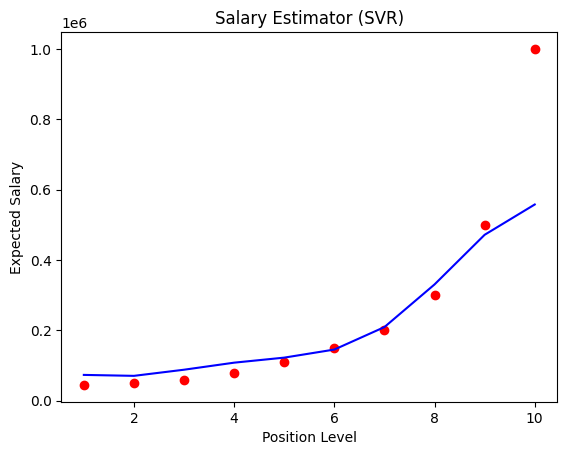

In [ ]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Expected Salary')
plt.title('Salary Estimator (SVR)')
plt.show()

###### SVR model (smoother curve)

C:\Users\G531G-N\AppData\Local\Temp\ipykernel_26368\2669036219.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


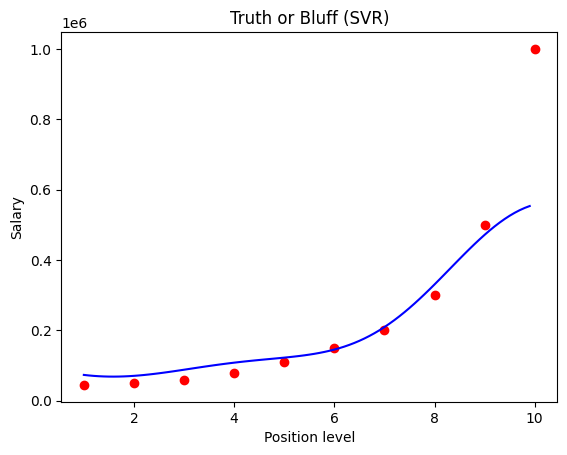

In [20]:
import numpy as np
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()